<a href="https://colab.research.google.com/github/arogya247/Python-Projects/blob/master/SignLanguageDigitsClassification_withMobileNetModel_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
import itertools
import numpy as np
import os, shutil, random, glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
%matplotlib inline

In [ ]:
!wget https://github.com/ardamavi/Sign-Language-Digits-Dataset/archive/master.zip

In [3]:
!unzip -q master.zip

In [4]:
!mv /content/Sign-Language-Digits-Dataset-master/Dataset /content/

In [5]:
!rm -r /content/Sign-Language-Digits-Dataset-master

In [7]:
os.chdir('/content/Dataset/')

In [8]:
if os.path.isdir('train/0/') is False:
  os.mkdir('train')
  os.mkdir('test')
  os.mkdir('valid')

  for i in range(0,10):
    shutil.move(f'{i}', 'train')
    os.mkdir(f'valid/{i}')
    os.mkdir(f'test/{i}')

    valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}', f'valid/{i}')

    test_samples = random.sample(os.listdir(f'train/{i}'), 5)
    for j in test_samples:
      shutil.move(f'train/{i}/{j}', f'test/{i}')

In [12]:
train_path = 'train/'
valid_path = 'valid/'
test_path = 'test/'

In [11]:
!ls

test  train  valid


In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path,
target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path,
target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,
target_size=(224,224), batch_size=10, shuffle=False)

# **Modify Model**

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
mobile.summary()

In [16]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [17]:
model = Model(inputs=mobile.input, outputs=output)

In [18]:
for layer in model.layers[:-23]:
  layer.trainable = False

In [ ]:
model.summary()

# **Train The Model**

In [20]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2)

# **Predict Sign Language Digits**

In [22]:
test_labels = test_batches.classes

In [23]:
predictions = model.predict(x=test_batches, verbose=0)

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [25]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 4 1 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 4 1]
 [0 0 0 0 0 0 0 0 0 5]]


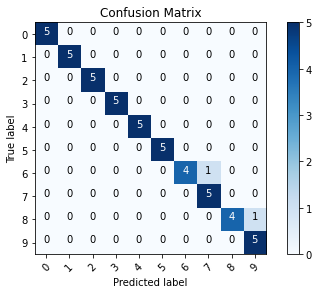

In [28]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')